# Part 1

In [46]:
import pandas as pd

dataset = pd.read_csv('netflix_data.csv')
dataset = dataset.set_index('show_id')
dataset = dataset[dataset['type'] == 'Movie']
dataset.drop(['type', 'title', 'director', 'cast', 'country', 'date_added', 'description'], axis=1)
dataset.dropna()

dataset.describe()

,release_year,duration
count,5377.000000,5377.000000
mean,2012.920030,99.307978
std,9.663282,28.530881
min,1942.000000,3.000000
25%,2012.000000,86.000000
50%,2016.000000,98.000000
75%,2018.000000,114.000000
max,2021.000000,312.000000


In [47]:
tmp_dataset = dataset.query('1990 <= release_year <= 1999')
frequent_duration = tmp_dataset['duration'].value_counts()
print(frequent_duration)

duration
94     8
101    6
108    5
93     5
95     5
      ..
83     1
138    1
141    1
100    1
191    1
Name: count, Length: 95, dtype: int64


In [48]:
short_movie_count = len(tmp_dataset[tmp_dataset['duration'] <= 90])
print(short_movie_count)

42


# part 2

<Axes: title={'center': 'Throughout whole release year'}, xlabel='release_year'>

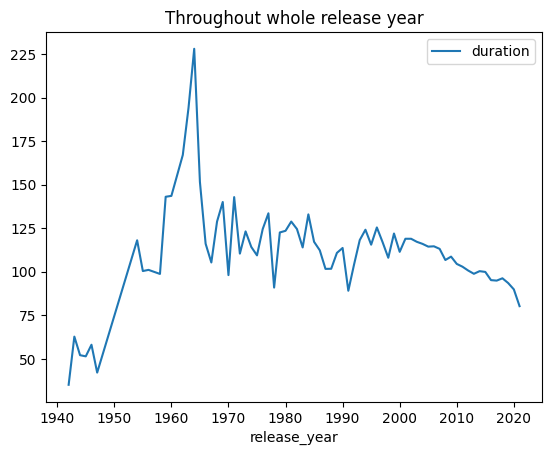

In [49]:
dataset.groupby('release_year')[['duration']].mean().plot(title='Throughout whole release year')

<Axes: title={'center': 'After 2000 release year'}, xlabel='release_year'>

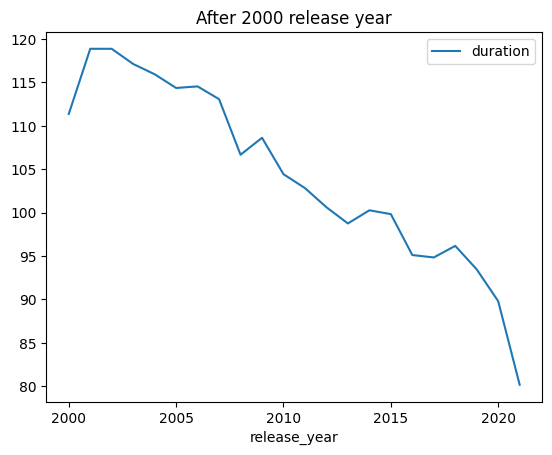

In [58]:
dataset_2000 = dataset[dataset['release_year'] >= 2000]
dataset_2000.groupby('release_year')[['duration']].mean().plot(title='After 2000 release year')

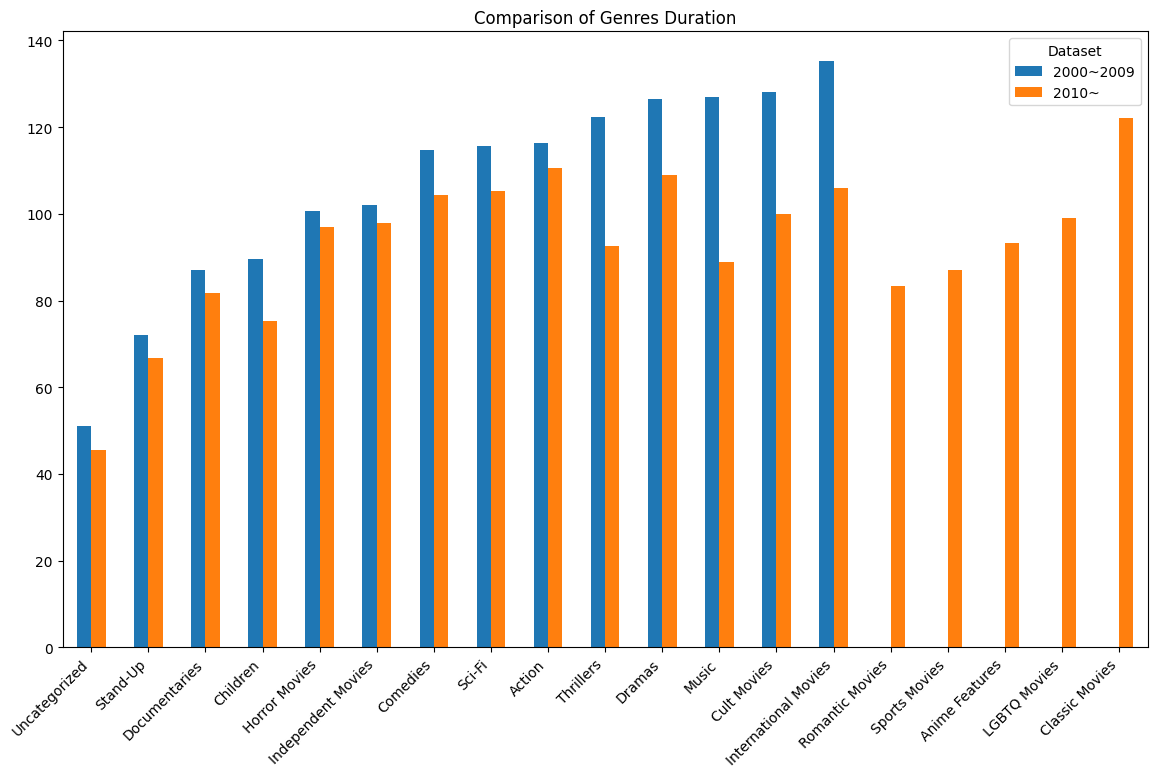

In [91]:
import matplotlib.pyplot as plt

data_before = dataset.query('2000 <= release_year <= 2009').groupby('genre')['duration'].mean().sort_values()
data_after = dataset.query('2010 <= release_year').groupby('genre')['duration'].mean().sort_values()

df1 = pd.DataFrame(data_before)
df2 = pd.DataFrame(data_after)

df = pd.concat([df1, df2], axis=1)
df.columns = ['2000~2009', '2010~']

df.plot(kind='bar', figsize=(14, 8))
plt.title('Comparison of Genres Duration')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Dataset')
plt.show()
